In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


In [5]:
dataset = pd.read_csv('auto_mpg_1983.csv');
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"\t""ford torino"""


In [6]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.251256,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.239958,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


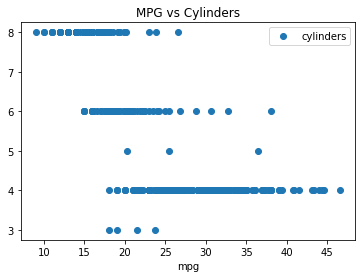

In [8]:
dataset.plot(x='mpg', y='cylinders', style='o')
plt.title('MPG vs Cylinders')
plt.show()

In [45]:
X = dataset.iloc[:, [1, 2, 4]].values 
X

array([[   8.,  307., 3504.],
       [   8.,  350., 3693.],
       [   8.,  318., 3436.],
       ...,
       [   4.,  135., 2295.],
       [   4.,  120., 2625.],
       [   4.,  119., 2720.]])

In [49]:
y = dataset.iloc[:, 0]
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
print(regressor.intercept_)

43.85123295368084


In [53]:
print(regressor.coef_)

[-0.16426671 -0.01523978 -0.00555366]


In [54]:
y_pred = regressor.predict(X_test)
y_pred

array([14.25687472, 26.94319373, 14.08727031, 24.82104018, 21.06957014,
       33.13884878, 30.91506704, 27.68738411, 15.55387202, 25.09542774,
       31.70781917, 30.67070602, 22.27808113, 29.1979584 , 14.69869734,
       31.06540921, 26.27467779, 25.70369981, 19.37130927, 29.97805089,
       12.42160803, 26.66551075, 27.24656821, 25.06126873, 29.65362072,
       24.19973623, 31.70408006, 28.18629564, 27.8913172 , 18.76287686,
       19.33243365, 27.86302443, 19.99552705, 31.09691661, 20.37949516,
       26.1460469 , 21.49720193, 12.98921914, 31.14703067,  8.49750974,
       11.43760356, 16.69351008, 26.5218812 , 28.85179179, 26.19913446,
       26.5774178 , 22.19696303, 12.87814595, 26.77481972, 31.08838945,
       29.79362117, 29.3770967 , 14.08171665, 30.38475811, 16.91257295,
       13.55567131, 22.48382877, 22.82347761, 27.97462209, 18.78011265,
       19.20690739, 26.81545956, 23.84084626, 24.1146379 , 12.21726046,
       11.32454247, 11.89079574, 19.84557824, 26.40448875, 11.88

In [55]:
y_test

65     14.0
132    25.0
74     13.0
78     21.0
37     18.0
       ... 
269    30.9
235    26.0
145    32.0
196    24.5
124    11.0
Name: mpg, Length: 80, dtype: float64

In [58]:
predicted = regressor.predict([[8, 455, 3500]])
predicted

array([16.16518905])

In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.46123468328964
Mean Squared Error: 18.457271495952583
Root Mean Squared Error: 4.2961926744447325


In [74]:
X2 = dataset.iloc[:, 1:5].values 
X2

array([[   8.,  307.,  130., 3504.],
       [   8.,  350.,  165., 3693.],
       [   8.,  318.,  150., 3436.],
       ...,
       [   4.,  135.,   84., 2295.],
       [   4.,  120.,   79., 2625.],
       [   4.,  119.,   82., 2720.]])

In [75]:
y2 = dataset.iloc[:, 0]
y2

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [79]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression()

In [80]:
print(regressor2.intercept_)

45.81891938863326


In [81]:
print(regressor2.coef_)

[-0.34819863  0.00240215 -0.06006418 -0.0049235 ]


In [82]:
y_pred2 = regressor2.predict(X_test2)
y_pred2

array([14.35754968, 27.74208491, 14.20830167, 24.82170384, 22.09215281,
       32.51305184, 31.00463297, 27.50087077, 16.46729429, 24.12171259,
       30.18991589, 30.78799913, 24.17073519, 30.31810709, 14.70463365,
       30.42790591, 26.39480814, 25.91731111, 20.17488054, 30.01324508,
       11.28787524, 27.31571756, 26.35545735, 23.5489824 , 29.88834109,
       22.88770491, 31.83500648, 27.61774435, 27.96248549, 19.86028421,
       19.84009518, 27.20228634, 23.10820501, 30.84961483, 20.86382485,
       25.67856486, 23.0719038 , 13.09769151, 30.89762918,  7.78999197,
        9.47288469, 15.78102183, 26.76591561, 27.0211951 , 25.88475574,
       25.01322527, 23.69226435, 11.49761715, 25.50431099, 30.92677152,
       29.54068195, 28.75097048, 14.80401995, 29.90561665, 16.20002646,
       10.2127351 , 23.15902679, 23.85861128, 28.03633794, 18.36865612,
       22.04868346, 27.80903702, 24.54897751, 24.55099142, 10.91172108,
       12.05826447, 10.79824826, 20.99315276, 26.78399234,  9.94

In [83]:
y_test2

65     14.0
132    25.0
74     13.0
78     21.0
37     18.0
       ... 
269    30.9
235    26.0
145    32.0
196    24.5
124    11.0
Name: mpg, Length: 80, dtype: float64

In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Mean Absolute Error: 3.46123468328964
Mean Squared Error: 18.457271495952583
Root Mean Squared Error: 4.2961926744447325
